In [1]:
import pandas as pd

# Load the dataset
df_hr = pd.read_csv('HR_comma_sep.csv')

# Display basic info about the dataset
print(df_hr.info())
print(df_hr.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86  

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


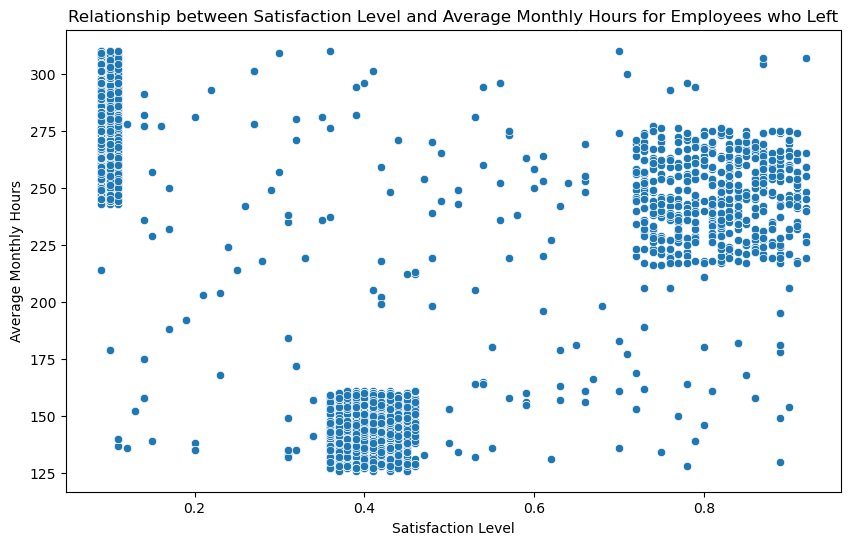

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_hr = pd.read_csv('HR_comma_sep.csv')

# Filter employees who have left (left == 1)
left_employees = df_hr[df_hr['left'] == 1]

# Check column names to ensure accuracy
print(df_hr.columns)

# Visualize the relationship between satisfaction level and average monthly hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='average_montly_hours', data=left_employees)  # Adjusted column name
plt.title('Relationship between Satisfaction Level and Average Monthly Hours for Employees who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.show()


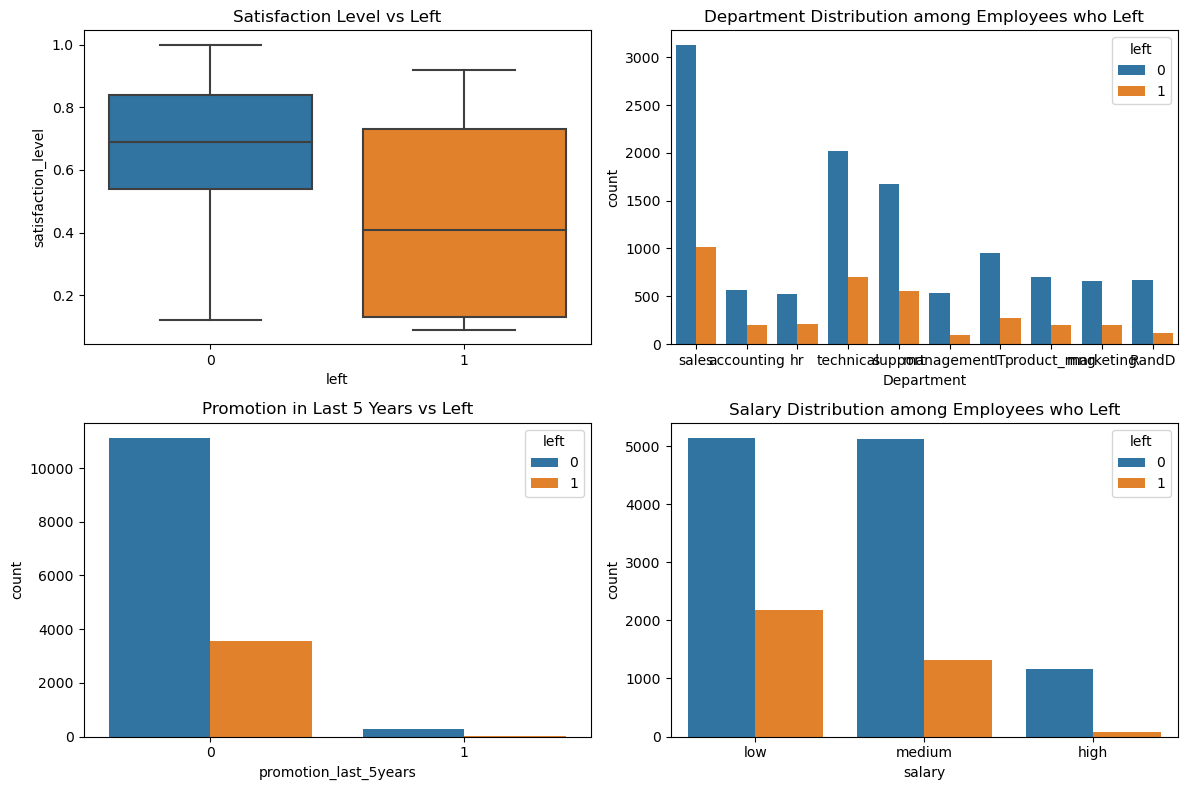

In [5]:
# Effect of satisfaction level, department, promotion, and salary on employees who left
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='left', y='satisfaction_level', data=df_hr)
plt.title('Satisfaction Level vs Left')

plt.subplot(2, 2, 2)
sns.countplot(x='Department', hue='left', data=df_hr)
plt.title('Department Distribution among Employees who Left')

plt.subplot(2, 2, 3)
sns.countplot(x='promotion_last_5years', hue='left', data=df_hr)
plt.title('Promotion in Last 5 Years vs Left')

plt.subplot(2, 2, 4)
sns.countplot(x='salary', hue='left', data=df_hr)
plt.title('Salary Distribution among Employees who Left')

plt.tight_layout()
plt.show()


In [7]:
print(df_hr.columns)
print(df_hr.head())
X = df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
           'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']]
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df_hr = pd.read_csv('HR_comma_sep.csv')

# Check column names to ensure accuracy
print(df_hr.columns)

# Filter employees who have left (left == 1)
left_employees = df_hr[df_hr['left'] == 1]

# Select predictors and target variable
X = df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
           'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']]
y = df_hr['left']

# Encode categorical variables if necessary (salary is categorical)
X = pd.get_dummies(X, columns=['salary'], drop_first=True)

# Split data into train and test sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Build a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Classification report on test set
print(classification_report(y_test, y_test_pred))



Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1              